# Clustering for classification?

Experiment done in the thesis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import leader_implementation as lead

In [2]:
def create_gaussian_dataset(samples = 2000, dimensions=5, clusters=3):
        np.random.seed(42)  # For reproducibility

        # Parameters for the Gaussian distributions
        num_dimensions = dimensions
        num_samples = samples
        num_clusters = clusters
        samples_per_cluster = num_samples // num_clusters

        # Means for the Gaussian distributions (randomly chosen)
        means = [np.random.rand(num_dimensions) * 10 for _ in range(num_clusters)]

        # Covariance matrices for the Gaussian distributions (randomly chosen, positive definite)
        covariances = [np.diag(np.random.rand(num_dimensions) + 0.1) for _ in range(num_clusters)]

        # Generate samples for each cluster
        X = []
        y = []
        for cluster_id in range(num_clusters):
            cluster_data = np.random.multivariate_normal(means[cluster_id], covariances[cluster_id], samples_per_cluster)
            X.append(cluster_data)
            y.append(np.full(samples_per_cluster, cluster_id))

        # Concatenate the data and labels
        X = np.vstack(X)
        y = np.concatenate(y)
        
        column_names = [f'Feature_{i}' for i in range(X.shape[1])]  # Create column names for features
        X = pd.DataFrame(X, columns=column_names)

        return X, y

### Create dataset for experiments

<Axes: xlabel='Feature_0', ylabel='Feature_1'>

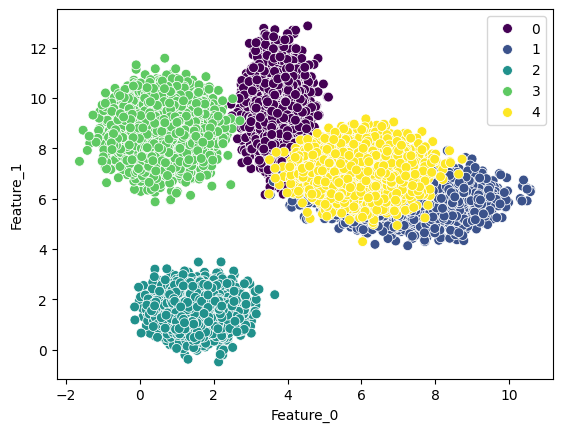

In [3]:
X, y = create_gaussian_dataset(20000, 2, 5)
varinfo_dict = {i: {'name': X.columns[i], 'type': 'Continuous'} for i in range(len(X.columns))}  
varinfo = pd.DataFrame(varinfo_dict).transpose()

sns.scatterplot(x=X['Feature_0'], y=X['Feature_1'], hue=y, palette='viridis', s=50)

### Execute Leader algorithms

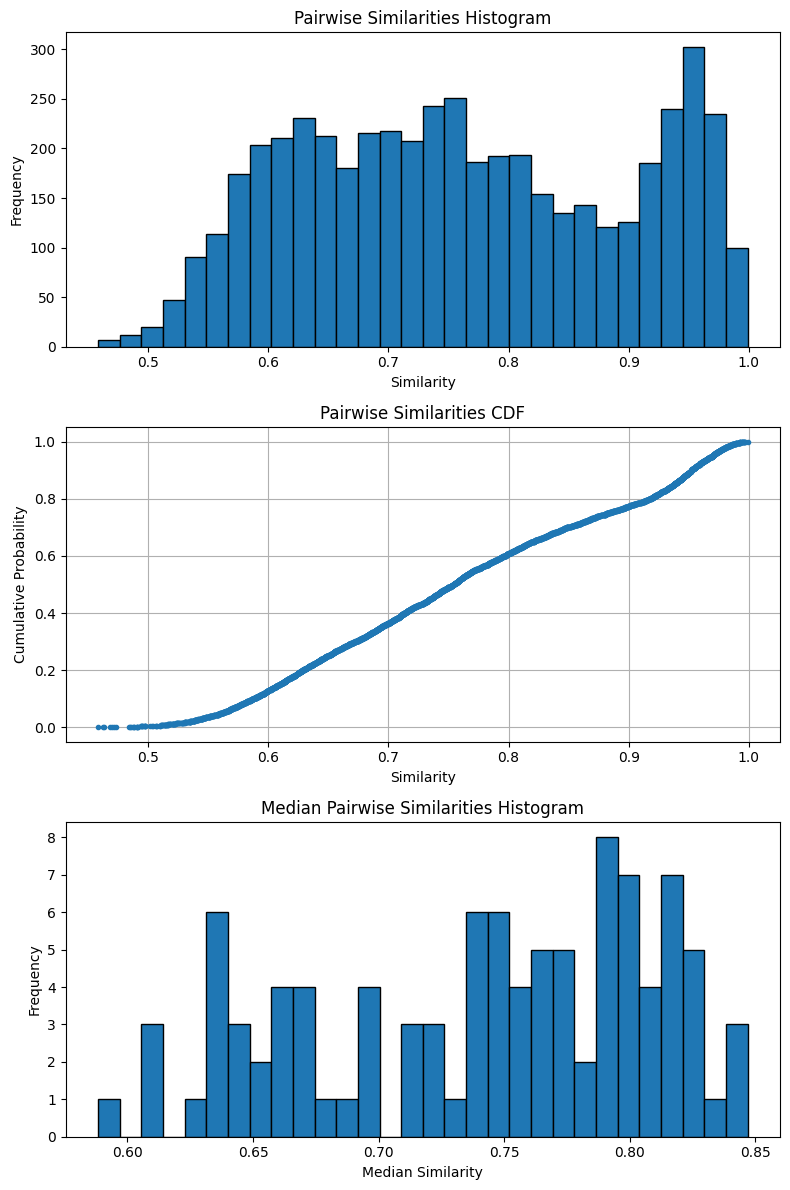

Mean similarity: 0.76
Quartiles: [0.65  0.75  0.88]


In [4]:
leader = lead.LeaderAlgorithms(X, varinfo, similarity_func='gower', seed=42)

#### Leader

In [5]:
s_min = 0.75

k, lead, clust = leader.Leader(s_min)

                 Leader                 

=========SUMMARY OF STATISTICS==========

Algorithm executed in 2.00 seconds

4 clusters have been found:

 Cluster 1     Leader: 0
               Size: 14548
               Average similarity: 0.8656
----------------------------------------
 Cluster 2     Leader: 4001
               Size: 1447
               Average similarity: 0.9208
----------------------------------------
 Cluster 3     Leader: 8000
               Size: 3999
               Average similarity: 0.9520
----------------------------------------
 Cluster 4     Leader: 12135
               Size: 6
               Average similarity: 0.9291
----------------------------------------


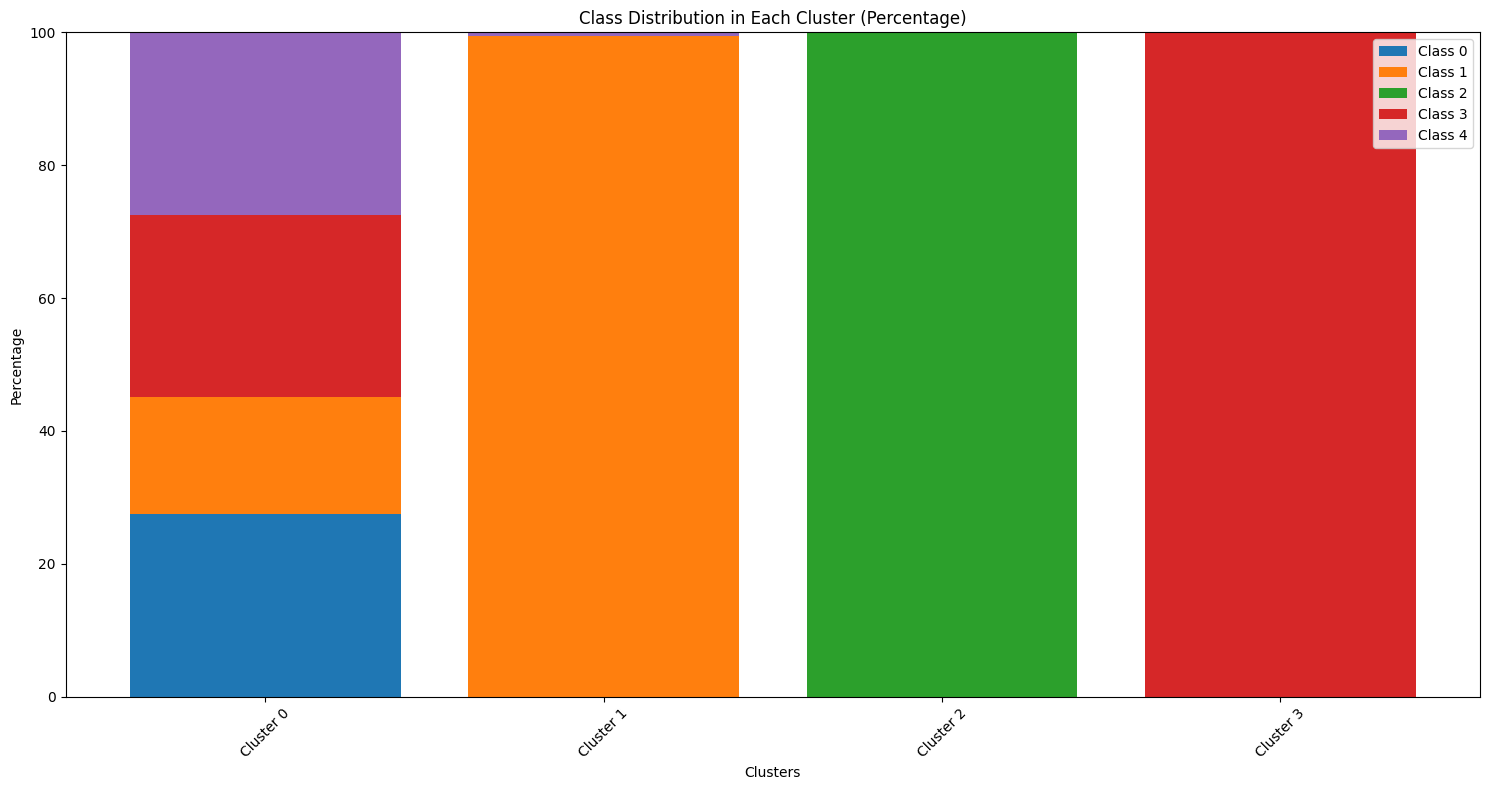

In [6]:
leader.cluster_classes_comparison(y)

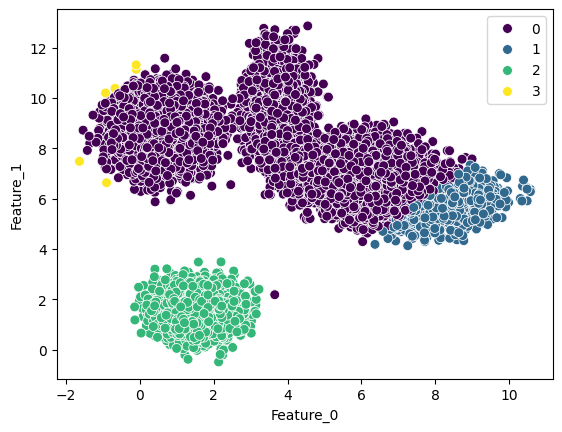

In [7]:
sns.scatterplot(x=X['Feature_0'], y=X['Feature_1'], hue=clust, palette='viridis', s=50)
plt.show()

#### Leader3 Medoid

             Leader3 Medoid             

=========SUMMARY OF STATISTICS==========

Algorithm executed in 26.04 seconds

4 clusters have been found:

 Cluster 1     Leader: 46
               Size: 3243
               Average similarity: 0.9622
----------------------------------------
 Cluster 2     Leader: 13502
               Size: 4703
               Average similarity: 0.9414
----------------------------------------
 Cluster 3     Leader: 7637
               Size: 8054
               Average similarity: 0.9409
----------------------------------------
 Cluster 4     Leader: 10968
               Size: 4000
               Average similarity: 0.9669
----------------------------------------


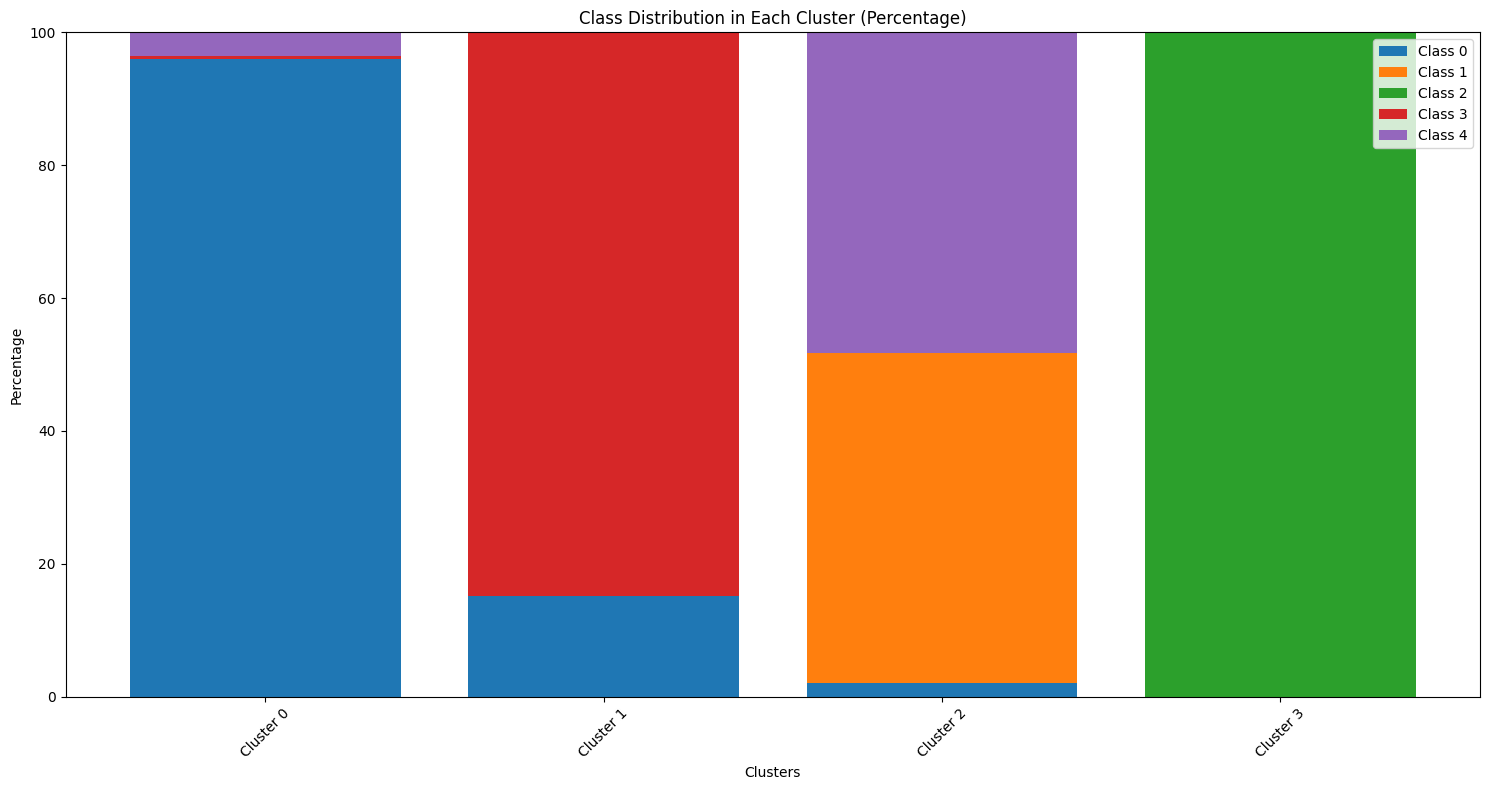

In [8]:
k, lead, clust = leader.Leader3_Medoid(s_min)
leader.cluster_classes_comparison(y)

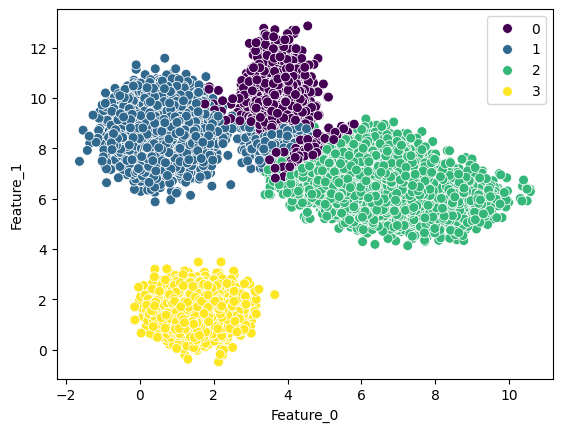

In [9]:
sns.scatterplot(x=X['Feature_0'], y=X['Feature_1'], hue=clust, palette='viridis', s=50)
plt.show()